### Homework 7: Problems
## Due Friday 13 November, by 4:59pm

### PHYS 440/540, Fall 2020
https://github.com/gtrichards/PHYS_440_540/


## Problems 1&2

Fill in the blanks in the code cells below.  Where I have asked a questions that requires an answer in words, I'm just looking for ~1 sentence.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

Let's create a 2-D data set that is close to, but isn't quite linear.

In [3]:
N=500
D=2

X = 10*np.random.random((N,D)) # N points in D dimensions
dy = np.random.normal(loc=0,scale=1,size=N) # add heteroscedastic errors
#Simulate a distribution that isn't quite linear, but close.  Adding some noise
y = 50 + 0.5*X[:,0]**2 + -0.8*X[:,1]**2 + dy 

Now see what the data look like.  It is 2-D so we need 2, 1-D plots.

Text(0, 0.5, 'y')

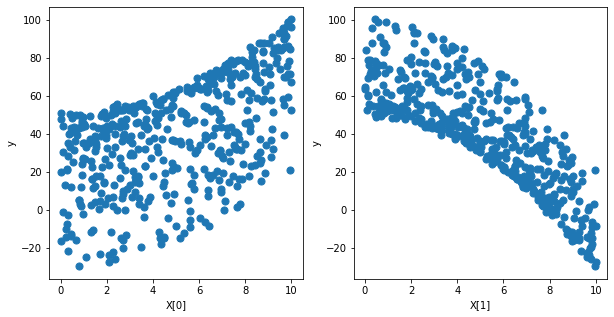

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].scatter(X[:,0],y,s=50)
ax[0].set_xlabel('X[0]')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y,s=50)
ax[1].set_xlabel('X[1]')
ax[1].set_ylabel('y')

Now try fitting it with plain vanilla linear regression.

In [5]:
linreg = LinearRegression()
linreg.fit(X, y)
intercept = linreg.intercept_
slopes = linreg.coef_
print(intercept,slopes)

55.69269457048863 [ 4.92415623 -7.9574304 ]


Plot some of those trends.  We first need a grid of X values for the sake of plotting.

In [6]:
Xgrid0 = np.linspace(X[:,0].min(),X[:,0].max(),50)
ypred0 = slopes[0]*Xgrid0 + intercept

Xgrid1 = np.linspace(X[:,1].min(),X[:,1].max(),50)
ypred1 = slopes[1]*Xgrid1 + intercept

Now plot the data and the best fit.

Text(0, 0.5, 'y')

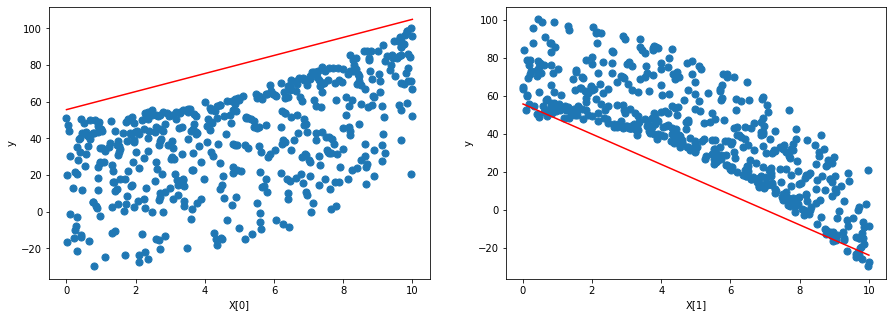

In [7]:
%matplotlib inline
fig,ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(X[:,0],y,s=50)
ax[0].plot(Xgrid0,ypred0,"r-")
ax[0].set_xlabel('X[0]')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y,s=50)
ax[1].plot(Xgrid1,ypred1,"r-")
ax[1].set_xlabel('X[1]')
ax[1].set_ylabel('y')

Why don't the lines go through the data?  The slopes look about right, but not the intercepts...

**The intercepts are off because we are doing linear regression in only one dimension of X.  Since X is actually 2D, the model does not have all the X information to predict an accurate intercept**

We can solve this problem with a 3-D plot showing both dimensions of X.

**Note that the 3-D plotting will NOT work in Jupyter Lab.  Just Jupyter Notebooks.**

In [8]:
uu, vv = np.meshgrid(Xgrid0, Xgrid1)
Xgrid = np.array([uu.flatten(), vv.flatten()]).T
print(Xgrid.shape)

(2500, 2)


In [9]:
ypred = linreg.predict(Xgrid)
print(ypred.shape)

(2500,)


<IPython.core.display.Javascript object>


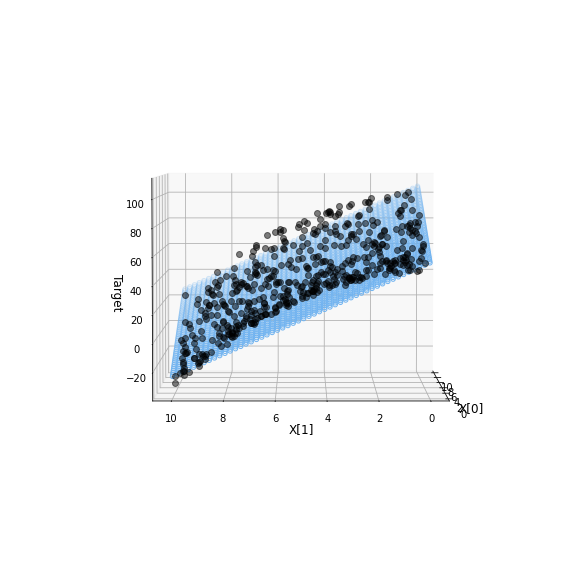

In [10]:
#Makes the plot interactive.  You can rotate it
#Sometimes I have to run this cell twice
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [11]:
#turn off "notebook" plotting
%matplotlib inline

Now try a D dimension polynomial regression.  See what 4th order does.

In [12]:
from astroML.linear_model import PolynomialRegression
order = 4
poly = PolynomialRegression(order) # fit Nth order polynomial
poly.fit(X,y)
ypredpoly = poly.predict(Xgrid)

<IPython.core.display.Javascript object>


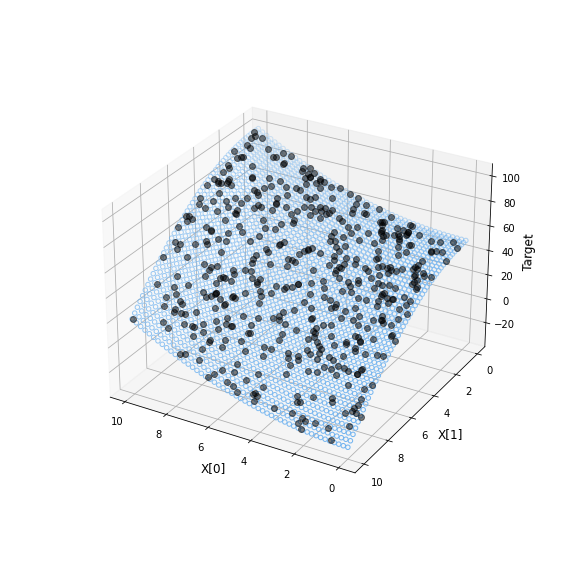

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredpoly, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [14]:
%matplotlib inline

Not bad!  Note that it does the polynomial regression in both dimensions of $X$.

Now do a Nadaraya-Watson regression on the data.  First with `h=0.2` as the bandwidth.

In [15]:
from astroML.linear_model import NadarayaWatson
nwreg = NadarayaWatson(kernel='gaussian',h=0.2)
nwreg.fit(X,y)
ypredNW = nwreg.predict(Xgrid)

<IPython.core.display.Javascript object>


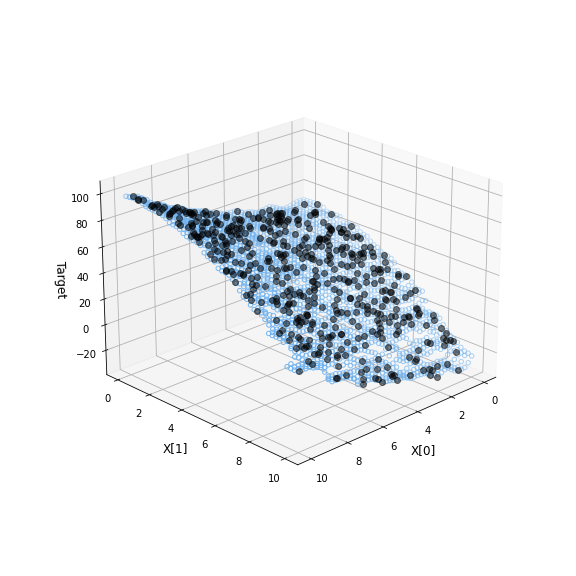

In [16]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredNW, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [17]:
%matplotlib inline

Note that that is kind of lumpy.  We could try different values of the bandwidth to make it smoother.

I was going to have you do a gridSearchCV that included all of those to find the best fit parameters of each and the best overall.  However, there seem to be some bugs with doing that the simple way (related to Python 3 and or the differences in API between sklearn and astroML?).  

But here is a link describing one way to do gridSearchCV across multiple models (which don't all have the same parameters:
http://www.davidsbatista.net/blog/2018/02/23/model_optimization/

For now, we'll just run gridSearchCV to determine the best Ridge regression parameters.  We'll try two different "solvers" as well, just so you can see how that works.

Regularization Practice

In [18]:
from sklearn.linear_model import Ridge
ridge_params = {
'alpha': [0.05,0.1,0.2,0.5],
'solver': ['svd', 'lsqr']
}

In [19]:
ridgeGrid = GridSearchCV(Ridge(), param_grid = ridge_params)
ridgeGrid.fit(X,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5],
                         'solver': ['svd', 'lsqr']})

What are the `best_params_` and the `best_score_` that goes with it?  Make a 3-D plot with those values

In [20]:
print(ridgeGrid.best_params_)
print(ridgeGrid.best_score_)

{'alpha': 0.5, 'solver': 'svd'}
0.9288507891578511


Now run the regression with those parameters.

In [21]:
ridgeReg = Ridge(alpha=0.5,solver='svd')
ridgeReg.fit(X,y)
ypredRidge = ridgeReg.predict(Xgrid)

<IPython.core.display.Javascript object>


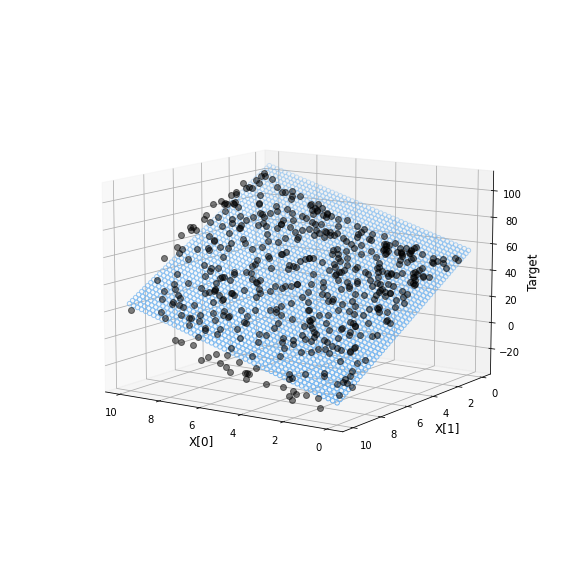

In [22]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredRidge, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [23]:
%matplotlib inline

Running Ridge Regression in this case doesn't really make sense.   Why not?  

**As we increase the regularization penalty and decrease the variance of the data (since ridge regression adds a penalty for non-zero coefficients), we increase the bias, but we don't have a large variance to begin with (this is an example of bias-variance tradeoff).**

Now try Gaussian Process Regression.  Note that this also returns the uncertainty on $y$.

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()
gp.fit(X,y)
ypredGP, dypredGP = gp.predict(Xgrid, return_std=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


<IPython.core.display.Javascript object>


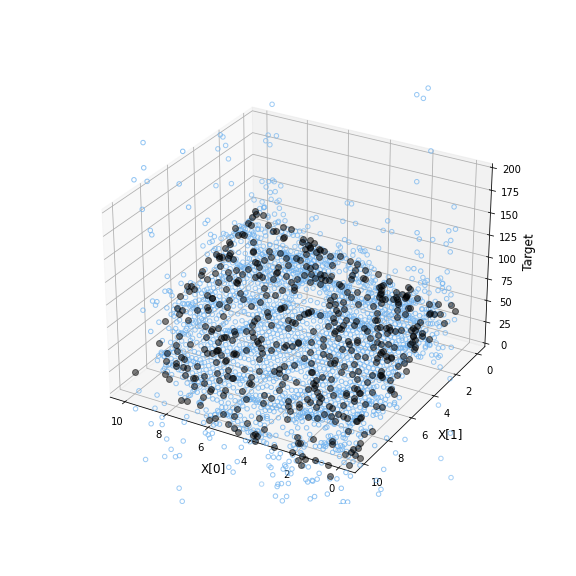

In [25]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredGP, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_zlim(0,200)

ax.view_init(elev=28, azim=120)

In [26]:
%matplotlib inline

Whoa!  In class, I made it sound like GP was the best solution.  So, what's going on here?  A bad choice of kernel for one (which we haven't talked about), but what else?


**The large uncertainty on y can mean that the data is underfitted from the model having too few parameters (ex: fitting a linear model to non-linear data) .**

So for these data, the PolynomialRegression seems best.  Let's figure out the best fit model, the coefficients of that model and how well we might expect to do with unknown data.

First do a train-test split with a `test_size` of 20%.  Also split out a cross-validation set from the training set (leaving a somewhat smaller set to use for training).

In [27]:
from sklearn.model_selection import train_test_split
Xtrainall, Xtest, ytrainall, ytest = train_test_split(X, y, test_size=1, random_state=42)

Xtrain, Xcv, ytrain, ycv = train_test_split(X,y, test_size=0.20, random_state=42)

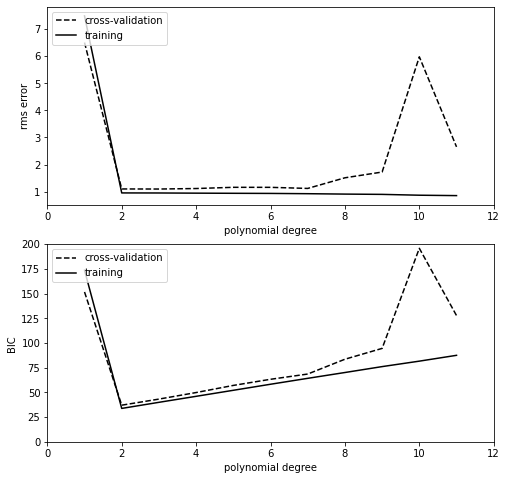

In [33]:
#import PolynomialRegression
from astroML.linear_model import PolynomialRegression

degrees = np.arange(1, 12)
training_err = np.zeros(degrees.shape)
crossval_err = np.zeros(degrees.shape)

fig = plt.figure(figsize=(8, 8))
for i,d in enumerate(degrees):
    #print(i,d)
    poly = PolynomialRegression(degree=d)

    poly.fit(Xtrain,ytrain)
    
    ypredTrain = poly.predict(Xtrain)
    ypredCV = poly.predict(Xcv)
    
    training_err[i] = np.sqrt(np.sum((ypredTrain - ytrain) ** 2)/len(ytrain))
    
    crossval_err[i] = np.sqrt(np.sum((ypredCV - ycv) ** 2)/len(ycv))

BIC_train = np.sqrt(len(y)) * training_err + degrees * np.log(len(y))
BIC_crossval = np.sqrt(len(y)) * crossval_err + degrees * np.log(len(y))

ax = fig.add_subplot(211)
ax.plot(degrees, crossval_err, '--k', label='cross-validation')
ax.plot(degrees, training_err, '-k', label='training')
#ax.plot(degrees, 0.1 * np.ones(degrees.shape), ':k')

ax.set_xlim(0, 12)

#ax.set_xlim(0, 14)
#ax.set_ylim(0, 0.8)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(degrees, BIC_crossval, '--k', label='cross-validation')
ax.plot(degrees, BIC_train, '-k', label='training')

ax.set_xlim(0, 12)
ax.set_ylim(0, 200)

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

Now use the best fit model to predict the error on unseen data.

In [39]:
poly = PolynomialRegression(2)
poly.fit(Xtrain,ytrain)

ypredTest = poly.predict(Xtest)

In [40]:
test_err = np.sqrt(np.sum((ypredTest - ytest) ** 2)/len(ytest))
print(test_err)

1.0364651720106153


What was the training error for that model?  What does that mean in terms of the importance of doing train-test splitting?

**The training error for the polynomial model of order 2 was 0.95. This is at the elbow of the validation error as well which means the most accurate model uses degree 2 polynomial features. Train-test splitting is important for simulating the test error with a test set that is representative of the sample data (by selecting an appropriately sized training set - increasing size of training set helps model accuracy but causes more variation in cross-validation and test error**

In [44]:
print(training_err[1])

0.9547349022514728


---

### Grade: 4.6/5 
- 2D & 3D plots & question(1): You are indeed fitting in 2D, but plotting in 1D (-0.2)
- Poly regression (0.5): 
- NW regression (0.5):
- Ridge regression & question (1):
- GP regression & question (1): It accturally overfits. (-0.2)
- Poly full & question (1): 